In [ ]:
# !pip install mido python-rtmidi

In [96]:
import mido
import time

In [2]:
open_ports = mido.get_input_names()
open_ports

['Erae Touch 0', 'MIDIIN2 (Erae Touch) 1', 'Akai APC40 2', 'Akai APC40 2']

In [104]:
record_time = 5.0  # seconds
start_time = time.time()
messages = []

def do_whateverA(arg: mido.messages.messages.Message):
    match arg.type:
        case "note_on":
            message = {
                "controller": "A",
                "type": arg.type,
                # "channel": arg.channel,
                # "note": arg.note,
                # "velocity": arg.velocity,
                "time": time.time() - start_time,
                # "arg": arg,
            }
            messages.append(message)
        case "control_change":
            message = {
                "controller": "A",
                "type": arg.type,
                # "channel": arg.channel,
                "control": arg.control,
                "value": arg.value,
                "time": time.time() - start_time,
                # "arg": arg,
            }
            messages.append(message)
        case _:
            pass

def do_whateverB(arg: mido.messages.messages.Message):
    match arg.type:
        case "note_on":
            message = {
                "controller": "B",
                "type": arg.type,
                "channel": arg.channel,
                "note": arg.note,
                "velocity": arg.velocity,
                "time": time.time() - start_time,
                # "arg": arg,
            }
            messages.append(message)
        case "control_change":
            message = {
                "controller": "B",
                "type": arg.type,
                "channel": arg.channel,
                "control": arg.control,
                "value": arg.value,
                "time": time.time() - start_time,
                # "arg": arg,
            }
            messages.append(message)
        case _:
            pass

portA = mido.open_input(open_ports[0], callback=do_whateverA)
# portB = mido.open_input(open_ports[1], callback=do_whatever)
portC = mido.open_input(open_ports[2], callback=do_whateverB)
# portD = mido.open_input(open_ports[3], callback=do_whatever)
time.sleep(record_time)
# portD.close()
portC.close()
# portB.close()
portA.close()

In [ ]:
for mess in filter(lambda d: d["controller"] == "A" and d["type"] == "note_on", messages):
    print(mess)

In [ ]:
for mess in filter(lambda d: d["controller"] == "A" and d["type"] == "control_change", messages):
    print(mess)

In [ ]:
for mess in filter(lambda d: d["controller"] == "A" and d["type"] == "control_change", messages):
    print(mess)

In [105]:
X, Y = [], []
# iteration sur les impacts
for i, mess in enumerate(filter(lambda d: d["controller"] == "A" and d["type"] == "note_on", messages)):
    # on prend les control_change qui suivent
    first_X = next(filter(lambda d: d["controller"] == "A" and d["type"] == "control_change" and d["control"] == 60 and d["time"] >= mess["time"], messages))
    first_Y = next(filter(lambda d: d["controller"] == "A" and d["type"] == "control_change" and d["control"] == 61 and d["time"] >= mess["time"], messages))
    X.append(first_X["value"])
    Y.append(first_Y["value"])

In [106]:
import json

with open("X.json", "w") as f:
    json.dump(X, f)

with open("Y.json", "w") as g:
    json.dump(Y, g)

In [101]:
import json

with open("X.json", "r") as f:
    X = json.load(f)

with open("Y.json", "r") as g:
    Y = json.load(g)

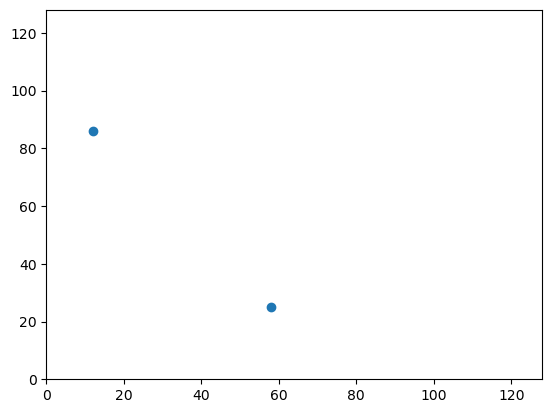

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlim(0, 128)
ax.set_ylim(0, 128)
ax.scatter(X, Y)

In [52]:
X, Y, t = [], [], []
for mess in filter(lambda d: d["controller"] == "A" and d["type"] == "control_change", messages):
    match mess["control"]:
        case 60:
            try:
                X.append(mess["value"])
                Y.append(Y[-1])
            except:
                pass
        case 61:
            try:
                Y.append(mess["value"])
                X.append(X[-1])
            except:
                pass

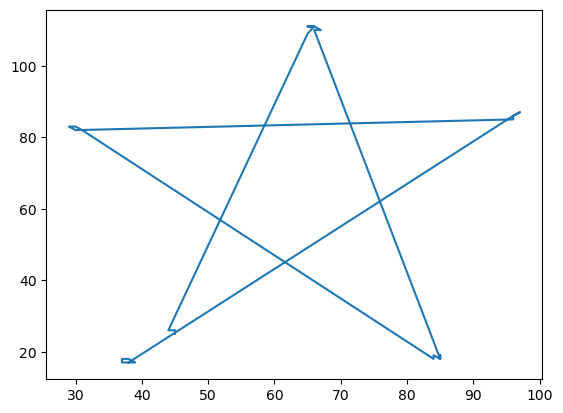

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
min_size = min(len(X), len(Y))
ax.plot(X[:min_size], Y[:min_size])

In [21]:
for mess in filter(lambda d: d["controller"] == "B" and d["type"] == "note_on", messages):
    print(mess)
    break

In [24]:
for mess in filter(lambda d: d["controller"] == "B" and d["type"] == "control_change", messages):
    print(mess["arg"])

control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 control=52 value=0 time=0
control_change channel=0 contro